In [2]:
import pandas as pd
import numpy as np

# Load your cleaned dataset
df= pd.read_csv("D:\Sem10\Machine Learning\cleaned_dataset.csv")
# sample_fraction = 0.1  # Adjust this fraction as needed
# data_sample = df.sample(frac=sample_fraction, random_state=42)
data = df.select_dtypes(include=[np.number])
data.describe()
feature_name = "total_amount"

# Define the number of bins (equal to the number of categories)
num_bins = 3

# Discretize the total amount into three categories based on equal frequency binning
data['total_amount_category'] = pd.qcut(data[feature_name], q=num_bins, labels=['high', 'mid', 'low'], duplicates='drop')

# Check the distribution of the categories
print(data['total_amount_category'].value_counts())

total_amount_category
high    339251
mid     337720
low     337359
Name: count, dtype: int64


# Logistic regrission WITHOUT K-Fold 
Variance: Minimal, as training and validation scores are close.
Bias: Low, with high accuracy and balanced metrics.
Performance: Excellent generalization with consistent accuracy on validation and test sets.
Regarding learning curves 
Training Score  is high and stays relatively constant.
Validation Score  is slightly lower than the training score but relatively stable.
Assessment:
The slight drop in the validation score compared to the training score suggests mild overfitting, but the model is generally performing well.
No Underfitting ,The scores indicate the model is learning effectively

Training Error: 0.010568552640659368
Validation Error: 0.010479824120355308
Test Accuracy: 0.989362436287993
Test Error: 0.01063756371200697
Classification Report:
               precision    recall  f1-score   support

        high       0.99      0.99      0.99     67736
         low       1.00      1.00      1.00     67245
         mid       0.98      0.98      0.98     67885

    accuracy                           0.99    202866
   macro avg       0.99      0.99      0.99    202866
weighted avg       0.99      0.99      0.99    202866



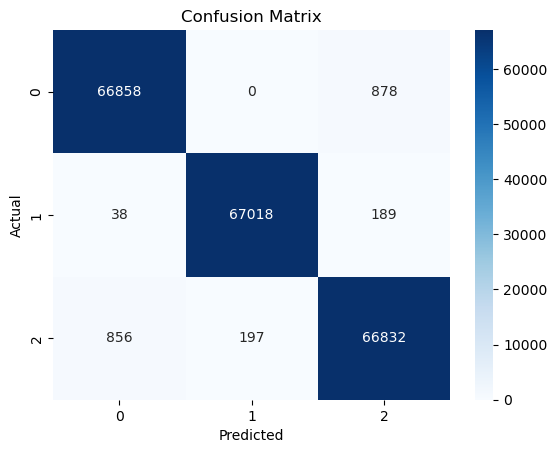

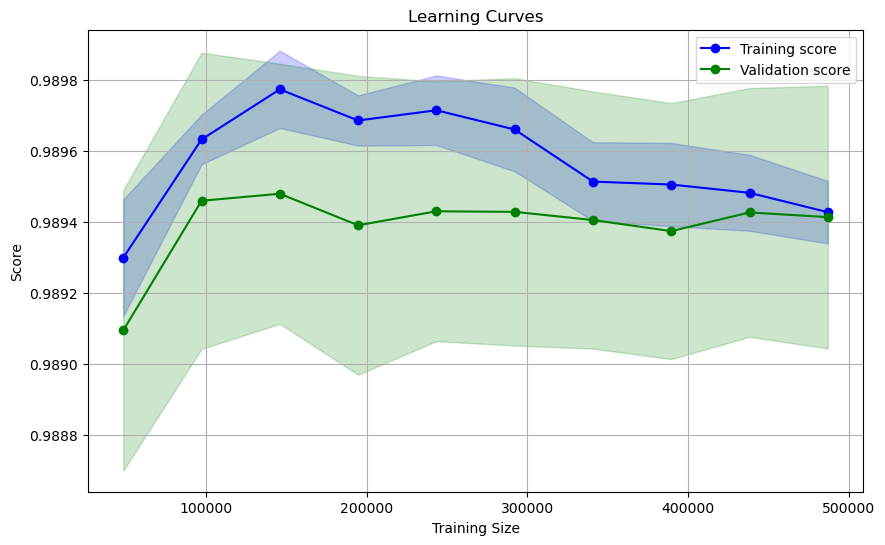

In [19]:
#Logistic regrission 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Assuming 'data' is your DataFrame
X = data.drop(['total_amount', 'total_amount_category'], axis=1)
y = data['total_amount_category']

# Step 1: Split the data into 60% training and 40% temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split the temporary set into 50% validation and 50% test sets (which is 20% of the original data each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features for training, validation, and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier with regularization
clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=500, random_state=42)

# Fit the classifier on the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = clf.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy

# Make predictions on the validation set
y_val_pred = clf.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_error = 1 - val_accuracy

print(f'Training Error: {train_error}')
print(f'Validation Error: {val_error}')

# Make predictions on the test set
y_test_pred = clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Error: {test_error}')

# Print the classification report
print('Classification Report:\n', classification_report(y_test, y_test_pred))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Function to plot learning curves
def plot_learning_curves(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='green', alpha=0.2)
    plt.title('Learning Curves')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot learning curves for the Logistic Regression model
plot_learning_curves(clf, X_train_scaled, y_train)


# Logistic regrission K-Fold
Variance Minimal, as training and validation scores are close
Bias Low  with high accuracy and balanced metrics
Performance is excellent generalization with consistent accuracy across folds
Training Score is generally high but fluctuates.
Validation Score is also fluctuates but does not consistently rise or fall significantly
No Overfitting since the training and validation scores are similar and high, it indicates that the model is not overfitting
No Underfitting the model is also not underfitting as both scores are high, showing that the model generalizes well.

# Comparison between logistic regrission with and without K-fold 
Accuracy and Error Rates :both methods achieve similar high accuracy (~0.989).
Error rates are comparable and low, indicating good model performance in both scenarios.
Consistency and Generalization:

K-Fold Cross-Validation: Offers insights into the model's performance consistency across different subsets of the data, confirming generalization across various folds
Single Train-Test Split: Provides high accuracy but may be less reliable in assessing generalization if the data split is not representative of the overall dataset

Overfitting/Underfitting: Neither approach shows signs of overfitting or underfitting. Both methods indicate that the model generalizes well to unseen data.
Both methods perform similarly in terms of final accuracy but K-Fold Cross-Validation provides a more comphensive evaluation of the model's generalization so it is the better approach for performance validation in most scenarios.
For the tuned hyperparameters both use same parametrs   
Penalty: 'l2' - L2 regularization (Ridge)
Solver: 'lbfgs' - Limited-memory Broyden–Fletcher–Goldfarb–Shanno (optimization algorithm)
Max Iterations: 500 - Maximum number of iterations taken for the solvers to converge
Random State: 42 - Ensures reproducibility of results

Average Accuracy: 0.9894353908491318

Fold 1 Classification Report:
              precision    recall  f1-score        support
high           0.986450  0.987136  0.986793   67629.000000
low            0.996653  0.996830  0.996742   67515.000000
mid            0.984644  0.983787  0.984215   67722.000000
accuracy       0.989244  0.989244  0.989244       0.989244
macro avg      0.989249  0.989251  0.989250  202866.000000
weighted avg   0.989243  0.989244  0.989243  202866.000000

Fold 1 Confusion Matrix:
[[66759     0   870]
 [   45 67301   169]
 [  872   226 66624]]

Fold 2 Classification Report:
              precision    recall  f1-score        support
high           0.987671  0.986943  0.987307   67856.000000
low            0.997220  0.996775  0.996998   67297.000000
mid            0.984246  0.985409  0.984827   67713.000000
accuracy       0.989693  0.989693  0.989693       0.989693
macro avg      0.989712  0.989709  0.989711  202866.000000
weighted avg   0.989695  0.989693  0.989694 

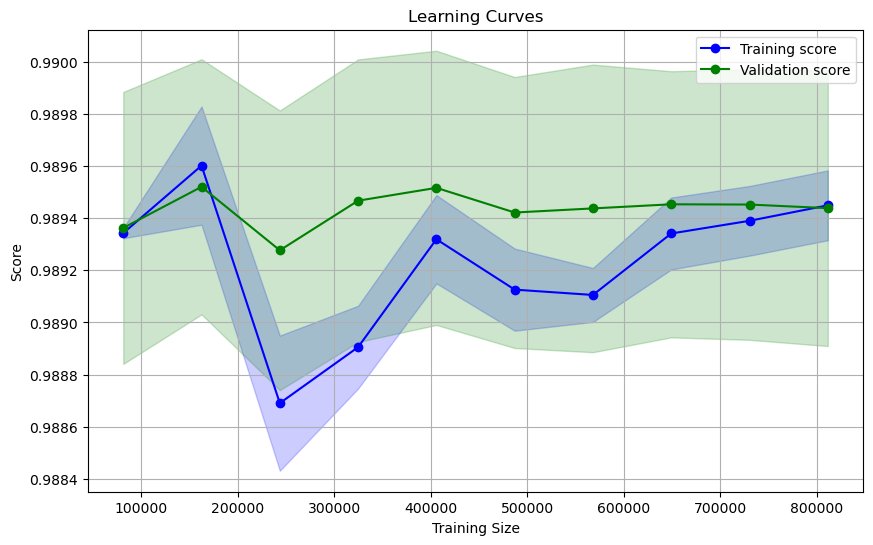

In [5]:
#Logisticcccc regrissionnnnnnn 
#First Learning Curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, learning_curve
import seaborn as sns

# Assuming 'data' is your DataFrame
X = data.drop(['total_amount', 'total_amount_category'], axis=1)
y = data['total_amount_category']

# Initialize k-fold cross-validation with k=5
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the classifier with regularization
clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=500, random_state=42)

# Lists to store evaluation metrics for each fold
fold_accuracies = []
fold_classification_reports = []
fold_confusion_matrices = []

# K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Standardize the features for training and test sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit the classifier on the training data
    clf.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_test_pred = clf.predict(X_test_scaled)
    
    # Calculate accuracy and store it
    fold_accuracy = accuracy_score(y_test, y_test_pred)
    fold_accuracies.append(fold_accuracy)
    
    # Store classification report and confusion matrix
    fold_classification_reports.append(classification_report(y_test, y_test_pred, output_dict=True))
    fold_confusion_matrices.append(confusion_matrix(y_test, y_test_pred))

# Calculate average accuracy
average_accuracy = np.mean(fold_accuracies)

print(f'Average Accuracy: {average_accuracy}')

# Print the classification report and confusion matrix for each fold
for i in range(k):
    print(f'\nFold {i+1} Classification Report:')
    print(pd.DataFrame(fold_classification_reports[i]).transpose())
    print(f'\nFold {i+1} Confusion Matrix:')
    print(fold_confusion_matrices[i])

# Plotting learning curves
def plot_learning_curves(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=k, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='green', alpha=0.2)
    plt.title('Learning Curves')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Fit the scaler on the entire dataset and transform it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot learning curves for the Logistic Regression model using k-fold cross-validation
plot_learning_curves(clf, X_scaled, y)


# Here is logistic regrission from scratch to tune the hyperparameters alpha and lamda the previous code was the built in python function 


C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\1556827516.py:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\1556827516.py:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\1556827516.py:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\1556827516.py:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\1556827516.py:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h

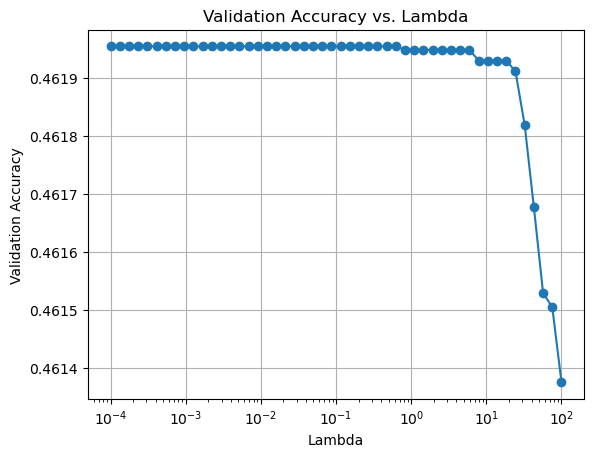

Best lambda: 0.0001
Best validation accuracy: 46.20%


In [33]:
# this code to find the best lamda according to the best accuracy 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Regularized cost function for logistic regression
def compute_cost_regularized(X, y, theta, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))  # Regularization term, excluding bias term
    cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
    return cost

# Regularized gradient descent function with convergence criteria
def gradient_descent_regularized(X, y, theta, alpha, num_iterations, tolerance, lambda_):
    m = len(y)
    for i in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - y))
        reg_term_gradient = (lambda_ / m) * np.vstack(([[0]], theta[1:]))  # Regularization term gradient
        theta -= alpha * (gradient + reg_term_gradient)
        cost = compute_cost_regularized(X, y, theta, lambda_)
        
        # Check for convergence
        if i > 0 and np.abs(cost - previous_cost) < tolerance:
            break
        previous_cost = cost

    return theta

# Prediction function
def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5

# Load data
#data = pd.read_csv('your_data.csv')  # Replace with actual data loading

# Encode categorical target variable
le = LabelEncoder()
data['total_amount_category'] = le.fit_transform(data['total_amount_category'])

# Prepare features and target variable
X = data.drop(['total_amount', 'total_amount_category'], axis=1).values
y = data['total_amount_category'].values.reshape(-1, 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Add intercept term to X
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Standardize the features
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_val[:, 1:] = scaler.transform(X_val[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

# Gradient descent settings
alpha = 0.1  # Learning rate
num_iterations = 1000
tolerance = 1e-6  # Convergence criteria

# Lambda tuning
lambda_values = np.logspace(-4, 2, 50)  # Generate 50 lambda values from 10^-4 to 10^2
val_accuracies = []

for lambda_ in lambda_values:
    # Initialize fitting parameters randomly
    np.random.seed(42)
    theta = np.random.randn(X_train.shape[1], 1)
    
    # Perform regularized gradient descent
    theta = gradient_descent_regularized(X_train, y_train, theta, alpha, num_iterations, tolerance, lambda_)
    
    # Predictions on the validation set
    y_val_pred = predict(X_val, theta)
    
    # Compute validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

# Plot validation performance vs. lambda
plt.plot(lambda_values, val_accuracies, marker='o')
plt.xscale('log')  # Logarithmic scale for lambda
plt.xlabel('Lambda')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Lambda')
plt.grid()
plt.show()

# Find the best lambda
best_lambda_idx = np.argmax(val_accuracies)
best_lambda = lambda_values[best_lambda_idx]
print(f'Best lambda: {best_lambda}')
print(f'Best validation accuracy: {val_accuracies[best_lambda_idx] * 100:.2f}%')


C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\2867160600.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\2867160600.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\2867160600.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\2867160600.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\2867160600.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h

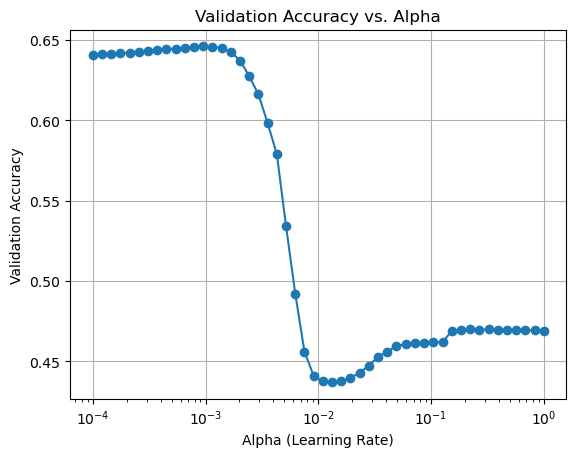

Best alpha: 0.0009540954763499944
Best validation accuracy: 64.62%


In [36]:
# this code to find the best alpha (learning rate) according to the best accuracy 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Regularized cost function for logistic regression
def compute_cost_regularized(X, y, theta, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))  # Regularization term, excluding bias term
    cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
    return cost

# Regularized gradient descent function with convergence criteria
def gradient_descent_regularized(X, y, theta, alpha, num_iterations, tolerance, lambda_):
    m = len(y)
    for i in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - y))
        reg_term_gradient = (lambda_ / m) * np.vstack(([[0]], theta[1:]))  # Regularization term gradient
        theta -= alpha * (gradient + reg_term_gradient)
        cost = compute_cost_regularized(X, y, theta, lambda_)
        
        # Check for convergence
        if i > 0 and np.abs(cost - previous_cost) < tolerance:
            break
        previous_cost = cost

    return theta

# Prediction function
def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5

# Load data
#data = pd.read_csv('your_data.csv')  # Replace with actual data loading

# Encode categorical target variable
le = LabelEncoder()
data['total_amount_category'] = le.fit_transform(data['total_amount_category'])

# Prepare features and target variable
X = data.drop(['total_amount', 'total_amount_category'], axis=1).values
y = data['total_amount_category'].values.reshape(-1, 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Add intercept term to X
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Standardize the features
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_val[:, 1:] = scaler.transform(X_val[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

# Lambda for regularization
lambda_ = 0.1  # A fixed value for lambda in this example

# Alpha tuning
alpha_values = np.logspace(-4, 0, 50)  # Generate 50 alpha values from 10^-4 to 10^0 (1)
val_accuracies = []

for alpha in alpha_values:
    # Initialize fitting parameters randomly
    np.random.seed(42)
    theta = np.random.randn(X_train.shape[1], 1)
    
    # Perform regularized gradient descent
    theta = gradient_descent_regularized(X_train, y_train, theta, alpha, 1000, 1e-6, lambda_)
    
    # Predictions on the validation set
    y_val_pred = predict(X_val, theta)
    
    # Compute validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

# Plot validation performance vs. alpha
plt.plot(alpha_values, val_accuracies, marker='o')
plt.xscale('log')  # Logarithmic scale for alpha
plt.xlabel('Alpha (Learning Rate)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Alpha')
plt.grid()
plt.show()

# Find the best alpha
best_alpha_idx = np.argmax(val_accuracies)
best_alpha = alpha_values[best_alpha_idx]
print(f'Best alpha: {best_alpha}')
print(f'Best validation accuracy: {val_accuracies[best_alpha_idx] * 100:.2f}%')


C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\3234919667.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\3234919667.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\3234919667.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\3234919667.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\3234919667.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h

Grid search results:
Lambda: 1e-05, Alpha: 0.001, Validation Accuracy: 64.63%
Lambda: 1e-05, Alpha: 0.01, Validation Accuracy: 43.78%
Lambda: 1e-05, Alpha: 0.1, Validation Accuracy: 46.20%
Lambda: 1e-05, Alpha: 0.5, Validation Accuracy: 46.95%
Lambda: 1e-05, Alpha: 1, Validation Accuracy: 46.92%
Lambda: 0.0001, Alpha: 0.001, Validation Accuracy: 64.63%
Lambda: 0.0001, Alpha: 0.01, Validation Accuracy: 43.78%
Lambda: 0.0001, Alpha: 0.1, Validation Accuracy: 46.20%
Lambda: 0.0001, Alpha: 0.5, Validation Accuracy: 46.95%
Lambda: 0.0001, Alpha: 1, Validation Accuracy: 46.92%
Lambda: 0.001, Alpha: 0.001, Validation Accuracy: 64.63%
Lambda: 0.001, Alpha: 0.01, Validation Accuracy: 43.78%
Lambda: 0.001, Alpha: 0.1, Validation Accuracy: 46.20%
Lambda: 0.001, Alpha: 0.5, Validation Accuracy: 46.95%
Lambda: 0.001, Alpha: 1, Validation Accuracy: 46.92%
Lambda: 0.01, Alpha: 0.001, Validation Accuracy: 64.63%
Lambda: 0.01, Alpha: 0.01, Validation Accuracy: 43.78%
Lambda: 0.01, Alpha: 0.1, Validatio

C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\3234919667.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
C:\Users\yasmin\AppData\Local\Temp\ipykernel_12460\3234919667.py:33: RuntimeWarning: invalid value encountered in double_scalars
  if i > 0 and np.abs(J_history[-1] - J_history[-2]) < tolerance:


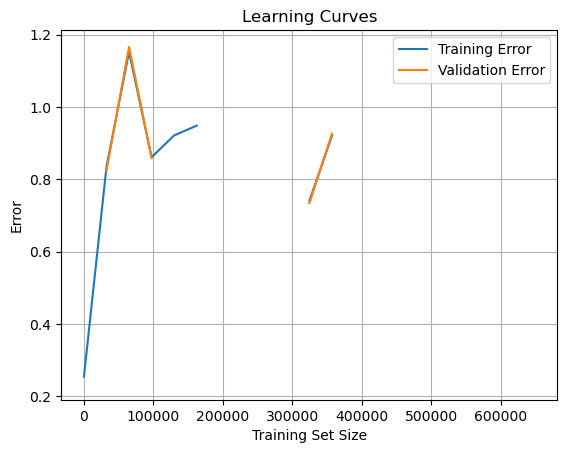

In [38]:
#Implement a grid search function to find the best hyperparameters (lambda and alpha) and 
#then applaying these functions to implement the logistic regrission from scratch

#Sigmoid function ---> Converts linear combinations to probabilities
# Cost computation with regularization -----> Calculates the regularized cost function
# Gradient descent with regularization -----> Optimizes parameters using gradient descent while applying regularization
# Prediction function ------> Converts sigmoid outputsto binary predictions

#regarding learning curves  

#Training Error  Starts high then decreases rapidly and then stabilizes
#Validation Error follows a similar pattern, with some fluctuation and tends to converge with the training error
# Overall Interpretation:
# High initial errors for both training and validation indicate overfitting.
# As the training set size increases, both errors decrease and stabilize, indicating improved model performance
# The gaps between training and validation errors are narrowing, suggesting reduced overfitting and better generalization
# Conclusion this plot confirms that the model reduces its error as more data is used for training
#Initially the model might overfit but with more training examples it learns to generalize better
#The convergence of training and validation errors indicates that the model is neither overfitting nor underfitting 
#significantly with more data.
#The models implemented using scikit-learn both with and without K-Fold cross-validation
#perform better than the custom logistic regression model from scratch 
#the slight differences between using K-Fold and not using it indicate that while cross-validation 
#provides a reliable measure of model performance  the specific split in the non-cross-validated model happened to align well in this case
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Regularized cost function for logistic regression
def compute_cost_regularized(X, y, theta, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))  # Regularization term, excluding bias term
    cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term
    return cost

# Regularized gradient descent function with convergence criteria
def gradient_descent_regularized(X, y, theta, alpha, num_iterations, tolerance, lambda_):
    m = len(y)
    J_history = []
    for i in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - y))
        reg_term_gradient = (lambda_ / m) * np.vstack(([[0]], theta[1:]))  # Regularization term gradient
        theta -= alpha * (gradient + reg_term_gradient)
        cost = compute_cost_regularized(X, y, theta, lambda_)
        J_history.append(cost.flatten()[0])  # Ensure cost is a scalar
        
        # Check for convergence
        if i > 0 and np.abs(J_history[-1] - J_history[-2]) < tolerance:
            break

    return theta, J_history

# Prediction function
def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5

# Grid search for the best lambda and alpha
def grid_search(X_train, y_train, X_val, y_val, lambda_values, alpha_values, num_iterations, tolerance):
    best_lambda = None
    best_alpha = None
    best_val_accuracy = 0
    best_theta = None

    results = []

    for lambda_ in lambda_values:
        for alpha in alpha_values:
            # Initialize fitting parameters randomly
            np.random.seed(42)
            theta = np.random.randn(X_train.shape[1], 1)
            
            # Train the model
            theta, _ = gradient_descent_regularized(X_train, y_train, theta, alpha, num_iterations, tolerance, lambda_)
            
            # Validation predictions
            y_val_pred = predict(X_val, theta)
            val_accuracy = accuracy_score(y_val, y_val_pred)
            
            results.append((lambda_, alpha, val_accuracy))

            # Update best parameters if current performance is better
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_lambda = lambda_
                best_alpha = alpha
                best_theta = theta

    # Print results
    print("Grid search results:")
    for result in results:
        print(f"Lambda: {result[0]}, Alpha: {result[1]}, Validation Accuracy: {result[2] * 100:.2f}%")

    return best_lambda, best_alpha, best_theta

# Load and prepare data (update this part as needed)
# Assuming 'data' is your DataFrame and 'total_amount_category' is your target
# Encode categorical target variable
le = LabelEncoder()
data['total_amount_category'] = le.fit_transform(data['total_amount_category'])

# Make sure the target variable is encoded numerically
X = data.drop(['total_amount', 'total_amount_category'], axis=1).values
y = data['total_amount_category'].values.reshape(-1, 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Add intercept term to X
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Standardize the features
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_val[:, 1:] = scaler.transform(X_val[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

# Define grid of lambda and alpha values
lambda_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
alpha_values = [0.001, 0.01, 0.1, 0.5, 1]

# Gradient descent settings
num_iterations = 1000
tolerance = 1e-6  # Convergence criteria

# Perform grid search
best_lambda, best_alpha, best_theta = grid_search(X_train, y_train, X_val, y_val, lambda_values, alpha_values, num_iterations, tolerance)

print(f"\nBest Lambda: {best_lambda}")
print(f"Best Alpha: {best_alpha}")

# Evaluate on test set
y_test_pred = predict(X_test, best_theta)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy with best parameters: {test_accuracy * 100:.2f}%")

# Plot learning curves with best parameters
def plot_learning_curves(alpha, num_iterations, tolerance, X_train, y_train, X_val, y_val, lambda_):
    train_errors = []
    val_errors = []
    m = len(y_train)

    for i in range(1, m + 1, max(1, m // 20)):
        theta_i = np.random.randn(X_train.shape[1], 1)  # Reset theta for each iteration
        theta_i, _ = gradient_descent_regularized(X_train[:i], y_train[:i], theta_i, alpha, num_iterations, tolerance, lambda_)
        train_error = compute_cost_regularized(X_train[:i], y_train[:i], theta_i, lambda_)
        val_error = compute_cost_regularized(X_val, y_val, theta_i, lambda_)
        train_errors.append(train_error.item())  # Flatten train_error
        val_errors.append(val_error.item())  # Flatten val_error

    plt.plot(range(1, m + 1, max(1, m // 20)), train_errors, label='Training Error')
    plt.plot(range(1, m + 1, max(1, m // 20)), val_errors, label='Validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curves(best_alpha, num_iterations, tolerance, X_train, y_train, X_val, y_val, best_lambda)
